<a href="https://colab.research.google.com/github/rsrikrishnan27/DS/blob/main/Nike%20Adidas%20Converse%20Classification/Nike_Adidas_Converse_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### The objective of this jupyter notebook is to classify shoe images into Nike, Adidas and Converse using an Inception V3 image recoginition model. A pre-trained InceptionV3 model is used here. 

## Importing required libraries

In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import ModelCheckpoint
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import image as mpimg

In [3]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [4]:
# Setting base directory of images 
base_dir = '/content/drive/My Drive/nike-adidas-and-converse-imaged/train'

### Image Samples

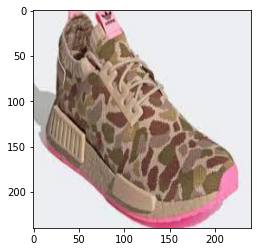

In [39]:
# Adidas
image = mpimg.imread("/content/drive/My Drive/nike-adidas-and-converse-imaged/train/adidas/135.jpg")
plt.imshow(image)
plt.show()

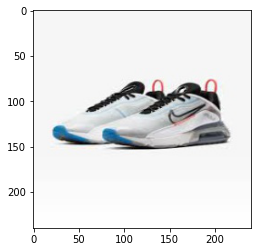

In [41]:
# Nike 
image = mpimg.imread("/content/drive/My Drive/nike-adidas-and-converse-imaged/train/nike/135.jpg")
plt.imshow(image)
plt.show()

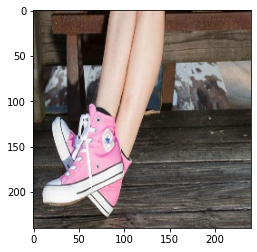

In [42]:
# Converse 
image = mpimg.imread("/content/drive/My Drive/nike-adidas-and-converse-imaged/train/converse/135.jpg")
plt.imshow(image)
plt.show()

## Loading Images

In [5]:
# Using ImageDataGenerator to load the Images for Training and Testing the CNN Model
datagenerator = {
    "train": ImageDataGenerator(horizontal_flip=True,
                                vertical_flip=True,
                                rescale=1. / 255,
                                validation_split=0.1,
                                shear_range=0.1,
                                zoom_range=0.1,
                                width_shift_range=0.1,
                                height_shift_range=0.1,
                                rotation_range=30,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     subset='training',
                                                    ),

    "valid": ImageDataGenerator(rescale=1 / 255,
                                validation_split=0.1,
                               ).flow_from_directory(directory=base_dir,
                                                     target_size=(300, 300),
                                                     subset='validation',
                                                    ),
}

Found 642 images belonging to 3 classes.
Found 69 images belonging to 3 classes.


## Initializing Inception V3 Pretrained model. (pretrained model included along with data in the zip file) 

In [6]:
base_model = InceptionV3(weights=None, include_top=False, input_shape=(300, 300, 3))

In [7]:
base_model.load_weights('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

In [8]:
base_model.trainable = False

## Adding few other layers

In [9]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.15),
    Dense(1024, activation='relu'),
    Dense(3, activation='softmax') # 3 Output Neurons for 3 Classes
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 23,904,035
Trainable params: 2,101,251
Non-trainable params: 21,802,784
____________________________________

In [11]:
# Using the Adam Optimizer to set the learning rate of our final model
opt = optimizers.Adam(learning_rate=0.0001)

# Compiling and setting the parameters we want our model to use
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 1024)              2098176   
                                                                 
 dense_1 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 23,904,035
Trainable params: 2,101,251
Non-trainable params: 21,802,784
____________________________________

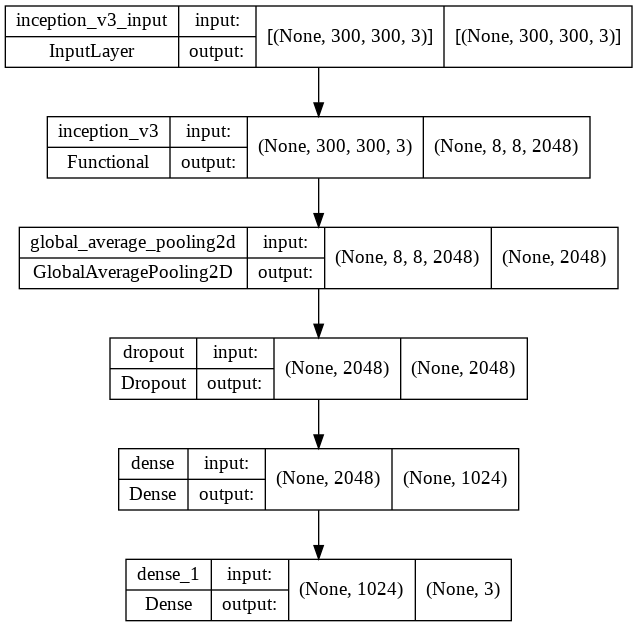

In [13]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

## Defining hyperparameters and training the model

In [43]:
# Setting variables for the model
batch_size = 32
epochs = 25

# Seperating Training and Testing Data
train_generator = datagenerator["train"]
valid_generator = datagenerator["valid"]

In [44]:
# Calculating variables for the model
steps_per_epoch = train_generator.n // batch_size
validation_steps = valid_generator.n // batch_size

print("steps_per_epoch :", steps_per_epoch)
print("validation_steps :", validation_steps)

steps_per_epoch : 20
validation_steps : 2


In [45]:
filepath = "model_{epoch:02d}-{val_accuracy:.2f}.h5"

# Using the ModelCheckpoint function to train and store all the best models
checkpoint1 = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

callbacks_list = [checkpoint1]
# Training the Model
history = model.fit_generator(generator=train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch,
                              validation_data=valid_generator, validation_steps=validation_steps,
                              callbacks=callbacks_list)

Epoch 1/25
20/20 [==============================] - ETA: 0s - loss: 0.5438 - accuracy: 0.7852
Epoch 1: val_accuracy improved from -inf to 0.68750, saving model to model_01-0.69.h5
20/20 [==============================] - 16s 774ms/step - loss: 0.5438 - accuracy: 0.7852 - val_loss: 0.7847 - val_accuracy: 0.6875
Epoch 2/25
20/20 [==============================] - ETA: 0s - loss: 0.5708 - accuracy: 0.7541
Epoch 2: val_accuracy improved from 0.68750 to 0.70312, saving model to model_02-0.70.h5
20/20 [==============================] - 15s 705ms/step - loss: 0.5708 - accuracy: 0.7541 - val_loss: 0.7495 - val_accuracy: 0.7031
Epoch 3/25
20/20 [==============================] - ETA: 0s - loss: 0.5649 - accuracy: 0.7459
Epoch 3: val_accuracy improved from 0.70312 to 0.81250, saving model to model_03-0.81.h5
20/20 [==============================] - 15s 729ms/step - loss: 0.5649 - accuracy: 0.7459 - val_loss: 0.6795 - val_accuracy: 0.8125
Epoch 4/25
20/20 [==============================] - ETA: 0

## Model Performance plots

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

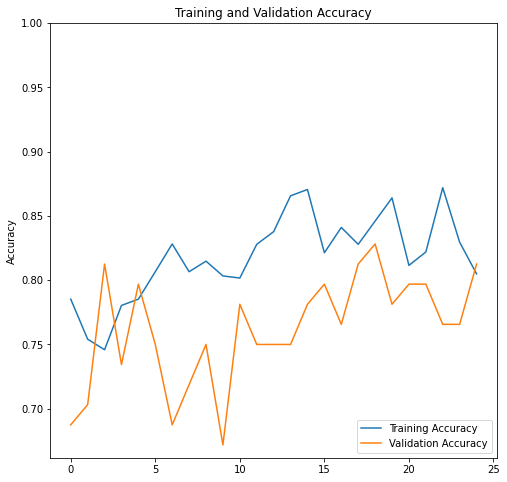

In [47]:
plt.figure(figsize=(8, 8))
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')
plt.show()

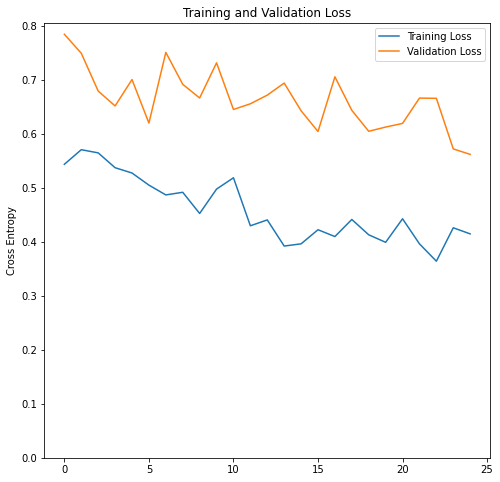

In [48]:
plt.figure(figsize=(8, 8))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()

In [49]:
# Calculate the Loss and Accuracy on the Validation Data
test_loss, test_acc = model.evaluate(valid_generator)
print('test accuracy : ', test_acc)

3/3 [==============================] - 0s 81ms/step - loss: 0.5574 - accuracy: 0.8116
test accuracy :  0.8115941882133484


We can see a slight overfitting. However, running the model for more epochs will produce better results

## Using the best model to predict test images

In [4]:
# Check our folder and import the model with best validation accuracy
loaded_best_model = keras.models.load_model("model_19-0.83.h5")

# Custom function to load and predict label for the image
def predict(img_rel_path):
    # Import Image from the path with size of (300, 300)
    img = image.load_img(img_rel_path, target_size=(300, 300))

    # Convert Image to a numpy array
    img = image.img_to_array(img, dtype=np.uint8)

    # Scaling the Image Array values between 0 and 1
    img = np.array(img)/255.0

    # Plotting the Loaded Image
    plt.title("Loaded Image")
    plt.axis('off')
    plt.imshow(img.squeeze())
    plt.show()

    # Get the Predicted Label for the loaded Image
    p = loaded_best_model.predict(img[np.newaxis, ...])

    # Label array
    labels = {0: 'adidas', 1: 'converse', 2: 'nike'}

    print("\n\nMaximum Probability: ", np.max(p[0], axis=-1))
    predicted_class = labels[np.argmax(p[0], axis=-1)]
    print("Classified:", predicted_class, "\n\n")

    classes=[]
    prob=[]
    print("\n-------------------Individual Probability--------------------------------\n")

    for i,j in enumerate (p[0],0):
        print(labels[i].upper(),':',round(j*100,2),'%')
        classes.append(labels[i])
        prob.append(round(j*100,2))
        
    def plot_bar_x():
        # this is for plotting purpose
        index = np.arange(len(classes))
        plt.bar(index, prob)
        plt.xlabel('Labels', fontsize=8)
        plt.ylabel('Probability', fontsize=8)
        plt.xticks(index, classes, fontsize=8, rotation=20)
        plt.title('Probability for loaded image')
        plt.show()
    plot_bar_x()

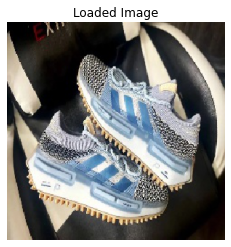



Maximum Probability:  0.5845073
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 41.1 %
CONVERSE : 0.45 %
NIKE : 58.45 %


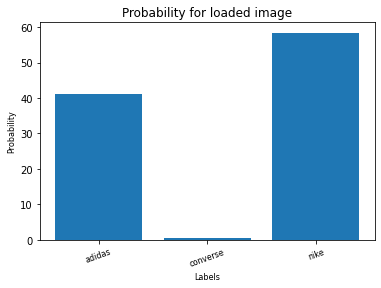

In [5]:
predict("/content/drive/My Drive/nike-adidas-and-converse-imaged/test/adidas/37.jpg")

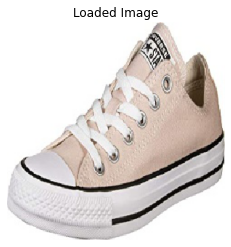



Maximum Probability:  0.5808498
Classified: converse 



-------------------Individual Probability--------------------------------

ADIDAS : 22.01 %
CONVERSE : 58.08 %
NIKE : 19.9 %


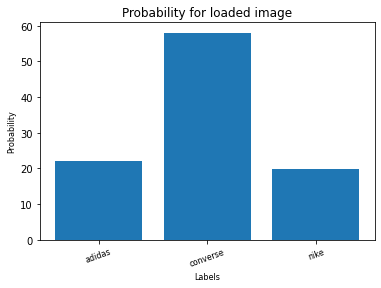

In [6]:
predict("/content/drive/My Drive/nike-adidas-and-converse-imaged/test/converse/24.jpg")

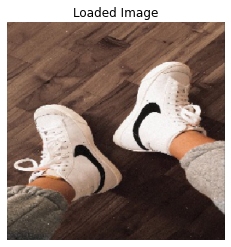



Maximum Probability:  0.5329793
Classified: nike 



-------------------Individual Probability--------------------------------

ADIDAS : 21.71 %
CONVERSE : 24.99 %
NIKE : 53.3 %


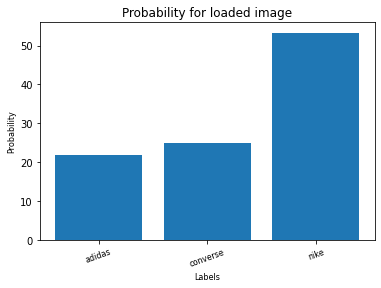

In [7]:
predict("/content/drive/My Drive/nike-adidas-and-converse-imaged/test/nike/15.jpg")